# Project Title - Let's talk with Black-friday-sales Data

I download black friday sales data from kaggle(https://www.kaggle.com/datasets/sdolezel/black-friday). I use various libraries and modules to make this project eg: Numpy, Pandas, Matplotlib, Seaborn, opendatasets and scipy. I learnt these libraries and techniques from Data Analysis with Python: Zero to Pandas. This is my first end to end project and I am really thankful to Aakash sir and jovian team who teach me for this completion. 

 


## Problem Statement
 A retail company ABC Private Limited wants to understand the customer purchese behaviour (specifically purshase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The dataset also contains customer demographics (Gender, Age, Occupation, City Category, marital status, stay_in_current _city), ,product detalis (product_id and product category) and Total purchase_amount from last month.
Data Overview

-	User_ID: Unique ID of the user.
-	Product_ID: Unique ID of the product.
-	Gender: indicates the gender of the person making the transaction.
-	Age: indicates the age group of the person making the transaction.
-	Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.
-	City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
-	Stay_In_Current_City_Years: Indicates how long the users has lived in this city.
-	Marital_Status: is 0 if the user is not married and 1 otherwise.
-	Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.
-	Purchase: Purchase amount.

## Downloading the Dataset

- we import 'opendatasets' module to download the dataset from kaggle.
- we import 'os' module to check data in directory.

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# Dataset link
dataset_url = 'https://www.kaggle.com/datasets/sdolezel/black-friday' 

In [4]:
# import the modules
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bhudeeppal
Your Kaggle Key: ········


100%|██████████| 7.51M/7.51M [00:00<00:00, 29.8MB/s]


The dataset has been downloaded and extracted.

In [5]:
# Data directory
data_dir = './black-friday'

In [6]:
import os
os.listdir(data_dir)

['test.csv', 'train.csv']

### import the important Modules

In [7]:
# import the libraries
import numpy as np
import pandas as pd


### Import the Dataset

In [8]:
# importing the dataset to program.
df_train = pd.read_csv("black-friday/train.csv")

In [9]:
type(df_train)

pandas.core.frame.DataFrame

In [10]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
df_train.shape

(550068, 12)

#### Observation:
In the Dataset-
- 550068 Rows 
- 12 Columns

Let us save and upload our work to Jovian before continuing.

In [12]:
project_name = "black-friday-project-starter-bhudeep" 

In [13]:
!pip install jovian --upgrade -q

In [14]:
import jovian

In [15]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhudeep555pal/black-friday-project-starter-bhudeep" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/bhudeep555pal/black-friday-project-starter-bhudeep


'https://jovian.ai/bhudeep555pal/black-friday-project-starter-bhudeep'

## Data Preparation and Cleaning

we check the empty values in each column and fill it to the backward and forward method with fillna function. Prepare the data for Data Analysis and visualization.  





In [16]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [18]:
# Missing values
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

#### Observation:
- missing value present only in two column; Product_Category_2 and Product_Category_3.


### Handling the missing Data.

In [19]:
# Percentage value missing in Product_Category_2
(df_train['Product_Category_2'].isna().sum())/len(df_train) * 100

31.56664266963357

In [20]:
# Percentage value missing in Product_Category_3
(df_train['Product_Category_3'].isna().sum())/len(df_train) * 100

69.67265865311198

#### Obsevation
- There are 32% observation missing in product_category_2.
- There are 70% observation missing in product_category_3.
- we will impute Product_Category_2 column because missing data in this columns less than 60% observations
- We will Delete the Column Product_Category_3 because missing data in this columns more than 60% observations.

Impute the purchase_category_2

In [21]:
# impute the purchase_category_2 by forward method
df_train['Product_Category_2'].fillna(method='pad',inplace=True)

In [22]:
# impute the purchase_category_2 by backward method
df_train['Product_Category_2'].fillna(method='bfill',inplace=True)

Drop the product_category_3 column

In [23]:
# drop the product_category_3 column
df_train.drop('Product_Category_3', axis=1, inplace = True)

In [24]:
df_train.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [25]:
import jovian

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhudeep555pal/black-friday-project-starter-bhudeep" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/bhudeep555pal/black-friday-project-starter-bhudeep


'https://jovian.ai/bhudeep555pal/black-friday-project-starter-bhudeep'

## Exploratory Analysis and Visualization

Before we ask the questions about the dataset we will classify the numeric and non-numeric columns and analyze each and every column of the dataset. Explore the distribution of the each numeric columns and basic charts for non-numeric columns and find useful insight about the columns.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [27]:
# import the libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

# Set the default Style
sns.set_style('darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12,6)

### Classify the Numeric and Non-numeric variables 

In [28]:
num_columns = [n for n in df_train.columns if df_train.dtypes[n] != 'object']
num_columns

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Purchase']

In [29]:
cat_columns = [c for c in df_train.columns if df_train.dtypes[c] == 'object']
cat_columns

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [30]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,6.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,6.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,14.0,7969


### Exploratory data Analysis with 'Non-numerical Columns'

### Column 1: Product_ID
product is uniquely identified to the different products.

In [31]:
df_train['Product_ID'].nunique()

3631

In [32]:
df_train['Product_ID'].value_counts().head(5)

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: Product_ID, dtype: int64

#### Observation: 
- There are 3631 diffenent product_Id's
- Product P00265242 is the most popular product.

### Column 2: Gender
Represent the gender of the costumer.

In [33]:
df_train['Gender'].unique()

array(['F', 'M'], dtype=object)

In [34]:
df_train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [35]:
# gender counts
gender_count = df_train.Gender.value_counts()
gender_count

M    414259
F    135809
Name: Gender, dtype: int64

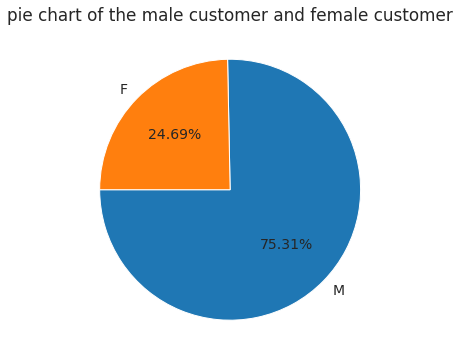

In [37]:
plt.pie(gender_count,labels=gender_count.index,autopct='%1.2f%%',startangle= 180)
plt.title('pie chart of the male customer and female customer');

#### Observation: 
- 75.3% of the transaction done by Male.
- 24.7% of the transaction done by Female.

### Column 3: Age
Represent the age-group of the costumer.Age-group divided into 7 different categories '0-17', '55+', '26-35', '46-50', '51-55', '36-45' and '18-25'.

In [38]:
df_train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [39]:
df_train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

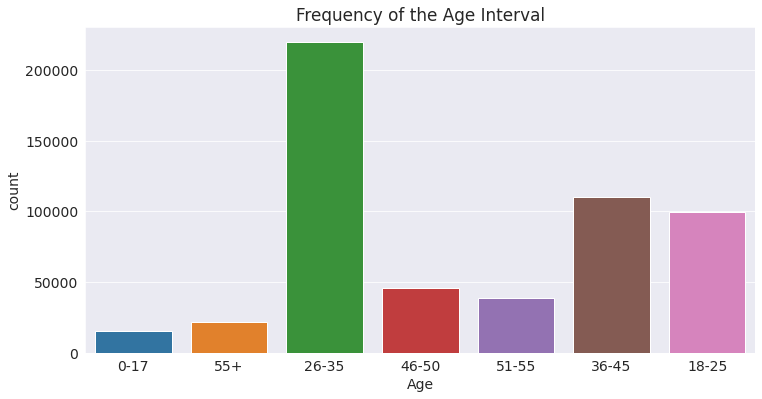

In [40]:
sns.countplot(x=df_train.Age)
plt.title('Frequency of the Age Interval');

#### Observation :
- Purchesers are mostly lie in the 26 to 35 age group.

### Column 4: City_Category
In this column the city are divided into the different categories. There are three different categories A,B and C.

In [41]:
df_train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [42]:
df_train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

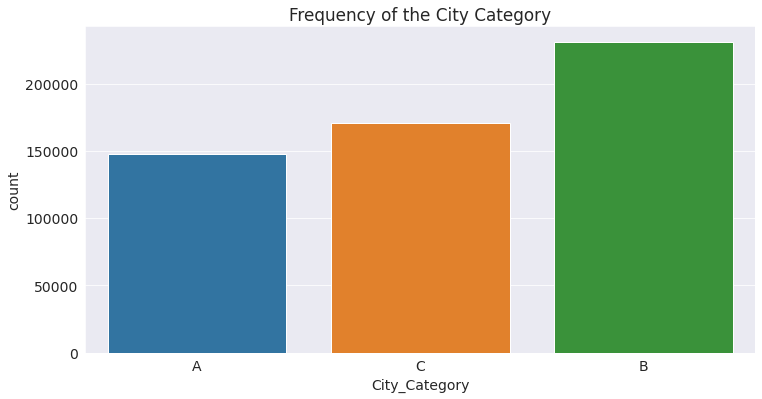

In [43]:
sns.countplot(x=df_train.City_Category)
plt.title('Frequency of the City Category');

#### Observation:
- Mostly Purchers are from category "B"
- Is group 'B' is the group of rich people?

### Column 6: Stay_In_Current_City_Years
This column represent the duration of the costumer stay in city. this duration is divided into five categories 0,1,2,3 and 4+.

In [44]:
df_train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [45]:
df_train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

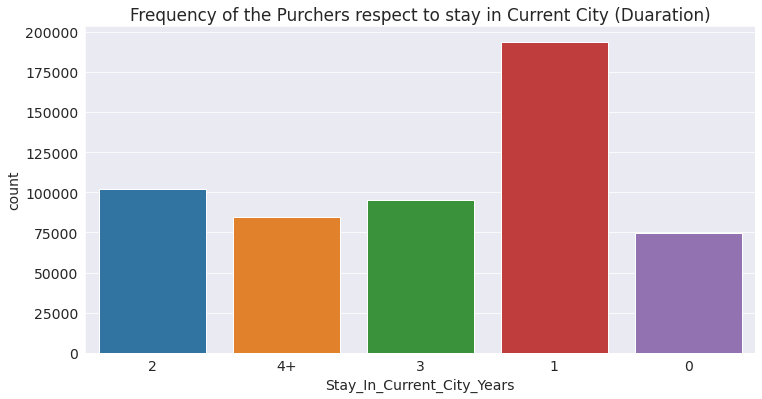

In [46]:
sns.countplot(x=df_train.Stay_In_Current_City_Years)
plt.title('Frequency of the Purchers respect to stay in Current City (Duaration)');

#### Observation: 
- The people purchase more who stay in city for one years.Why?
- The people who stay in less then 1 years have to purchase more to arrange the Households.
- Maybe they prefer local market to purchase and explore the city.

### Exploratory data Analysis with 'Numerical variables'

In [47]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.863190,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.049456,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,23961.000000


- purchase data is Right skewed i.e. mean > median
- Unmarried costumer is greater than married costumer.

### Column 7:  User_ID

column is uniquely identified to the costumer. 

In [48]:
# numeric column "User_ID"
df_train['User_ID'].nunique()

5891

In [49]:
df_train['User_ID'].value_counts().head(5)

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
Name: User_ID, dtype: int64

#### Observation
- There are 5891 unique ID's present.
- User_ID 1001680 did the highest transaction.

### Column 8:  Occupation
All the occupation divided into 21 different categories denoted by 0 to 20. 

In [50]:
# numeric column "Occupation"
df_train['Occupation'].nunique()

21

In [51]:
df_train['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequency of different Occupation in Data')

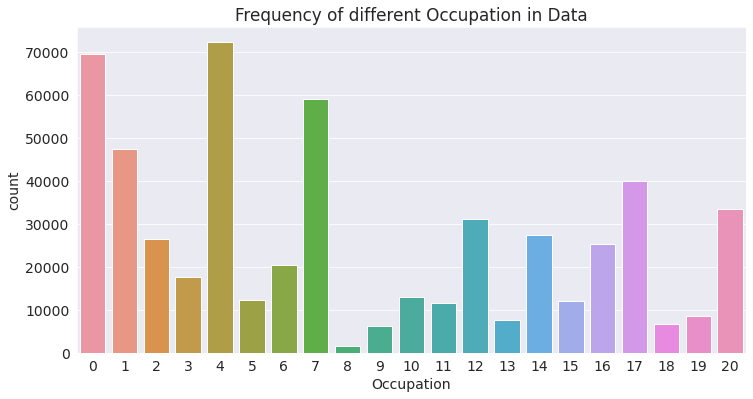

In [52]:
sns.countplot(df_train.Occupation)
plt.title('Frequency of different Occupation in Data')

#### Observation
- Occupation 4 has the higest transaction in dataset.
- Occupation 8 has the lowest transaction in dataset. 

### Column 9:  Marital_Status

In [53]:
df_train.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


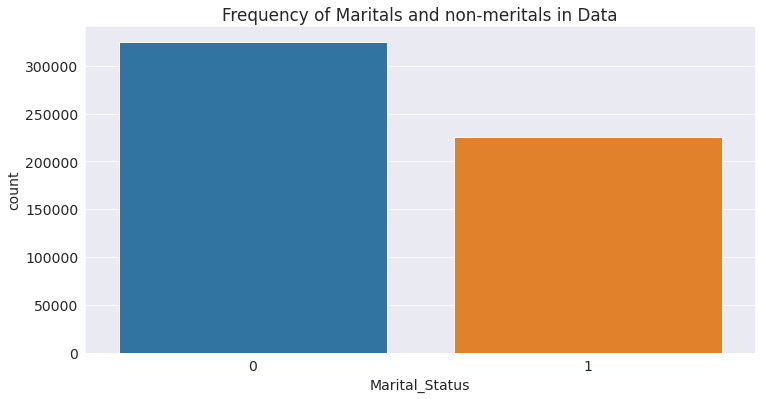

In [54]:
sns.countplot(df_train.Marital_Status)
plt.title('Frequency of Maritals and non-meritals in Data');

#### Observation :

- Unmarried purchase more than married.
- Married purchase think about manage the expences.



### Column 10:  Product_category_1
This is the classification of the product by first method. In this method product are divided into 20 different categories denoted by 1 to 20.

In [55]:
df_train.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [56]:
df_train.Product_Category_1.nunique()

20

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


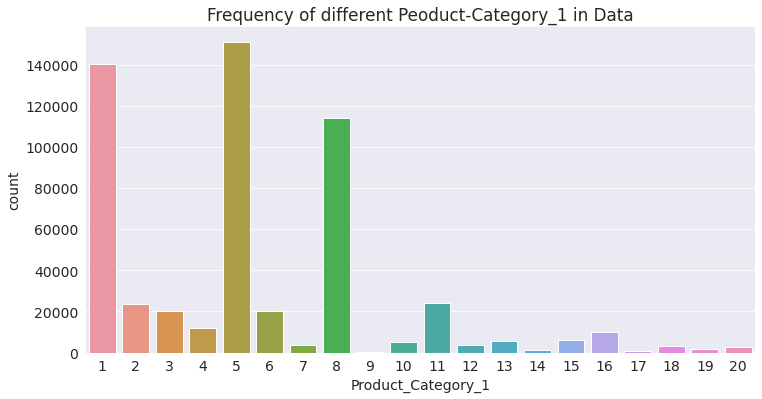

In [57]:
sns.countplot(df_train.Product_Category_1)
plt.title('Frequency of different Peoduct-Category_1 in Data');

#### Observation 
- category '5' is most famous product category and category '9' is less famous category.

### Column 11:  Product_category_2
This is the classification of the product by second method. In this method product are divided into 17 different categories denoted by 2.0 to 18.0.

In [58]:
df_train.Product_Category_2.unique()

array([ 6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [59]:
df_train.Product_Category_2.nunique()

17

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


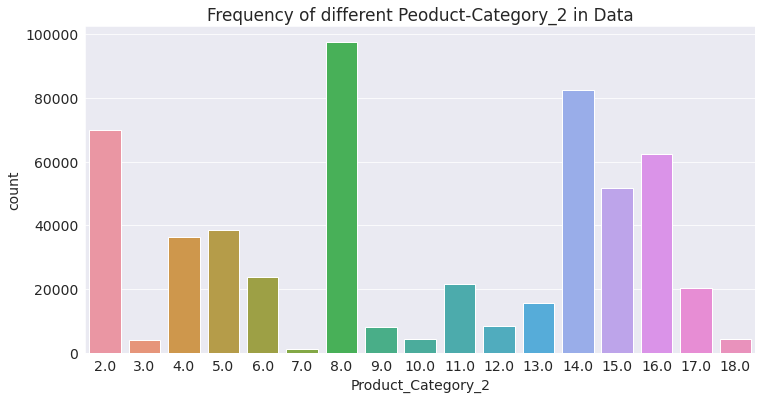

In [60]:
sns.countplot(df_train.Product_Category_2)
plt.title('Frequency of different Peoduct-Category_2 in Data');

#### Observation 
- category '8.0' is most famous product category and category '7.0' is less famous category.

### Column 12: Purchase
this column shows Purchase amount paid by the user for the product.

In [61]:
# importing libraries
from scipy import stats
from scipy.stats import norm

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


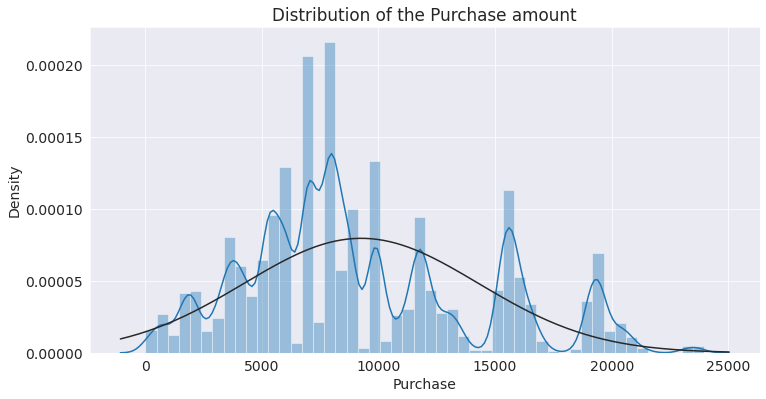

In [62]:
plt.title("Distribution of the Purchase amount")
sns.distplot(df_train['Purchase'], kde=True,fit=norm);

#### Observation
- purchase price is right skewed distributed.

## Asking and Answering Questions

We explore each of the columns of dataset and learnt about the data. Now we are able to answer the some basic questions about each the columns of the dataset. Now We try to answer to the another question.



### Q1: What is the behaviour of the shopping of different genders? Is same age-group has the same interest of shopping?  

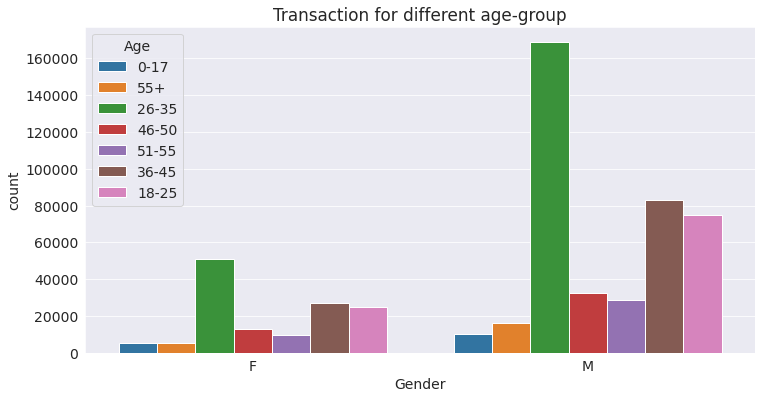

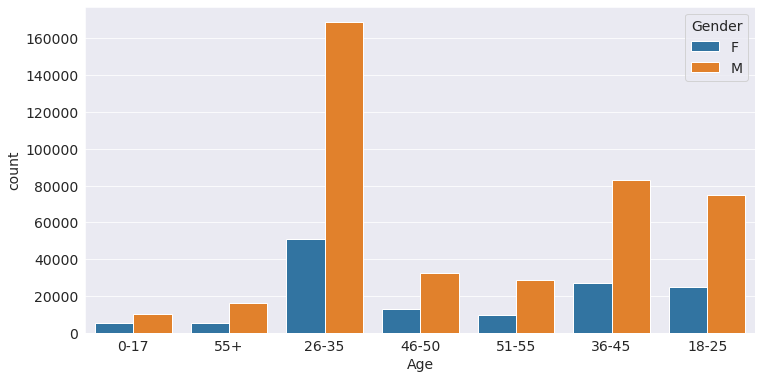

In [74]:
## Relation between transactions and age group for differnt genders.

sns.countplot(x='Gender',hue = 'Age',data = df_train)
plt.title('Transaction for different age-group')
plt.show()

## Another way to represent the relation between Age group and transaction.
sns.countplot(x='Age',hue = 'Gender',data = df_train)
plt.show()

#### Observation and Answer 
The shopping behaviour of men and women in the different age-categories are same.  
- same ratio of distribution shown by both the Genders.
- female transactions are 24.7% and the Male transactions are 75.3%.
- Age group 26-35 shops more than any other age-group.
- Age group 0-17 shops less than any other age-group.

### Q2: Is women are more expensive then the men in shopping ? Is women purchase costly product than men? 

In [75]:
f_purchase_total= df_train['Purchase'][df_train['Gender']=='F'].sum()

In [76]:
m_purchase_total= df_train['Purchase'][df_train['Gender']=='M'].sum()

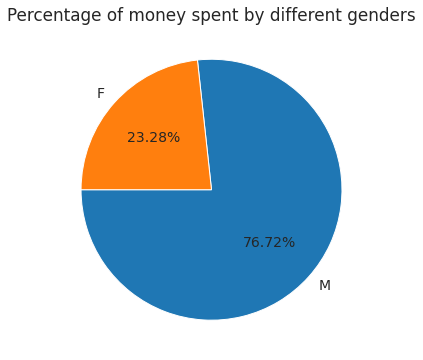

In [79]:
plt.pie([m_purchase_total,f_purchase_total],labels=['M','F'],autopct='%1.2f%%', startangle=180)
plt.title('Percentage of money spent by different genders');

#### Observations and answer
According to the data This statement is not true, after the deep analysis of this data women are less expensive and purchase less costly product than men. 
- 24.7% women purchased 23.3%  of tatal sales.
- 75.3% men purchase 76.7% of total sales.
- This data says that "women do not spent more" and "women purchase cheaper items than men."

### Q3: Who shop more? Old immigrants or new immigrants. What to say about the different genders.

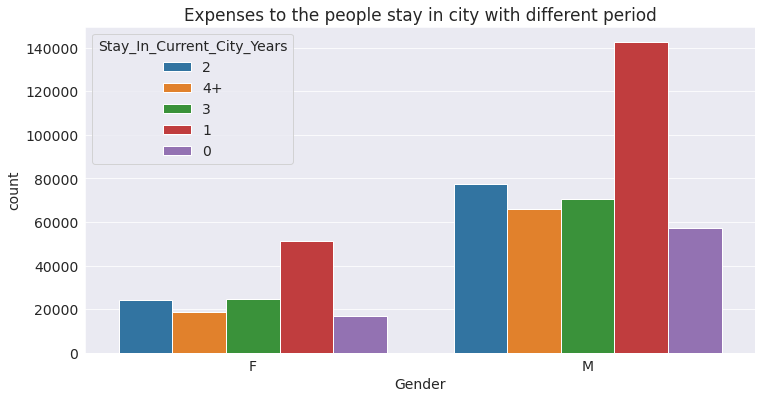

In [81]:
## Relation between transactions and stay_in_current_city_year for differnt genders.
sns.countplot(x='Gender',hue = 'Stay_In_Current_City_Years',data = df_train)
plt.title('Expenses to the people stay in city with different period');

#### Observation and Answer
People who stay in city for 1 year are most expensive than others and less expensive are the people who stay in city for less than one year. this trend followed by the men and women.
- people shop more, who stay in city for 1 year.
- people shop less, who stay in city less than 1 year.

### Q3: Is the behaviour of men and women in the same city category are same about the shopping or not? 

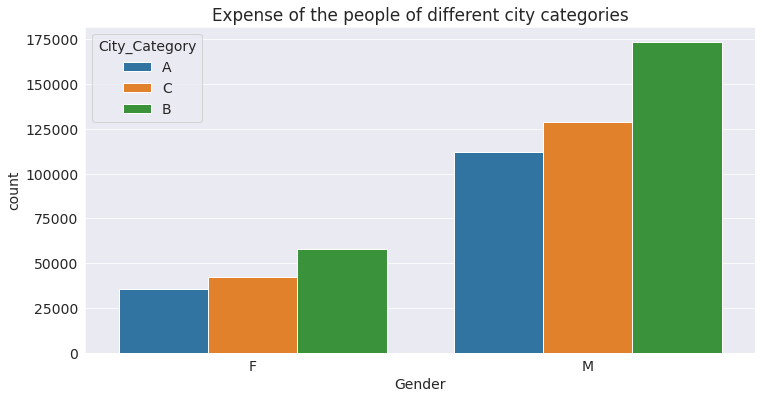

In [82]:
## Relation between transactions and city_category for differnt genders.
sns.countplot(x='Gender',hue = 'City_Category',data = df_train)
plt.title('Expense of the people of different city categories');

#### Observation and Answer
Men and Women in the different categories follow the trend of shopping accordingly. Men as well as Women in the city category 'B' are the more expensive then others.
- People of category'B' shop major
- May be group 'B' is the group of rich people.
- Shoping behaviour is same for Female and Male.

### Q4: Which category of the product are sold more than others? Is this is true in case of the men and women ?

In this data the each product divided into the different categories with two methods. first method is product_category_1 and second is product_category_2. In the first method the product are divided into 20 categories and In the second method the product are divided into 17 categories. 

we will find the result for different method sepretaly. 

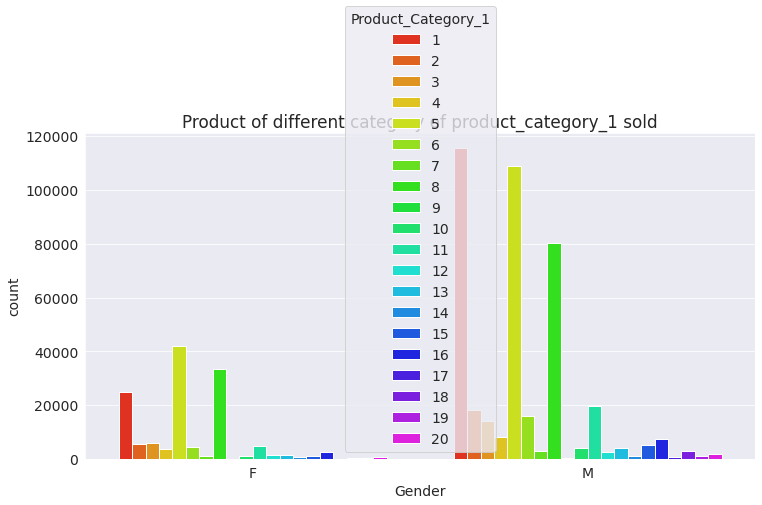

In [94]:
## Relation between transactions and Product_Category_1 for differnt genders.
sns.countplot(x='Gender',hue = 'Product_Category_1',data = df_train, palette = 'gist_rainbow')
plt.title('Product of different category of product_category_1 sold');

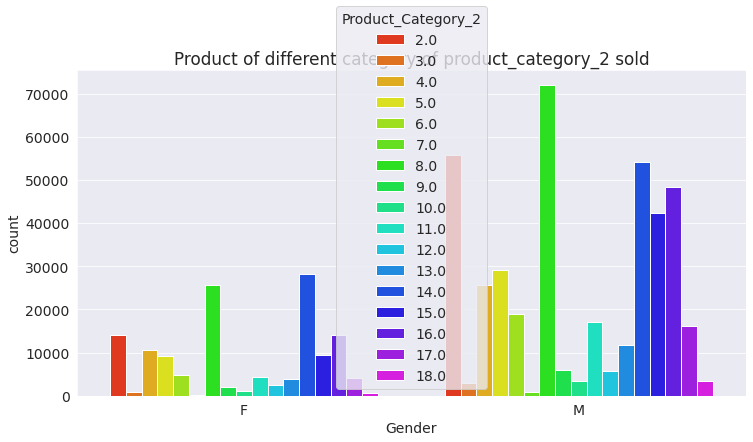

In [95]:
## Relation between transactions and Product_Category_2 for differnt genders.
sns.countplot(x='Gender',hue = 'Product_Category_2',data = df_train, palette = 'gist_rainbow')
plt.title('Product of different category of product_category_2 sold');

#### Observation and Answer 
The interest of the men and women is not same for the product categories. women purchase different items than men. 
- In Product_category_1, men purchase most of category '1' item but women purchase category '5' items.
- In Product_category_2, men purchase most of category '8.0' items but women purchase category '14.0' items.

### Q5: Is the people of different city category have the same interest of shopping with respect to different immigrants duration ? 

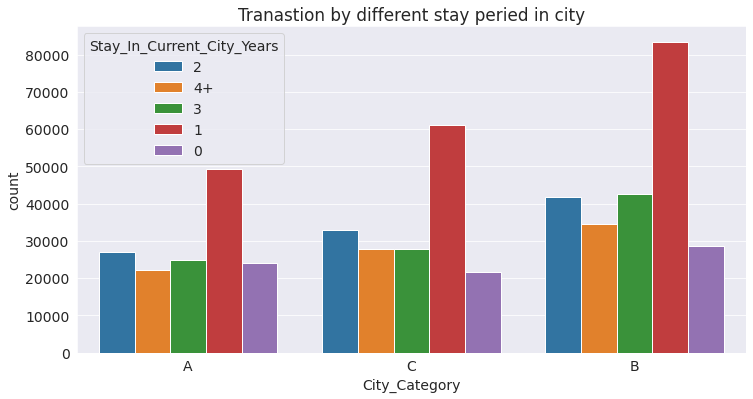

In [97]:
## Relation between transaction and stay time in the city respect to different city categories.
sns.countplot(x='City_Category',hue = 'Stay_In_Current_City_Years',data = df_train)
plt.title('Tranastion by different stay peried in city');

#### Observation and answer
The people of different city categories have the same interest in shopping according to the duration stay in the city. people expense more who stay in city for 1 year.
- Purchesing behaviour is almost same in all the catagory in diffent groups.

### Q6: Is Married do more shoping?  

In [98]:
Married_transaction = df_train['Marital_Status'].value_counts()
Married_transaction

0    324731
1    225337
Name: Marital_Status, dtype: int64

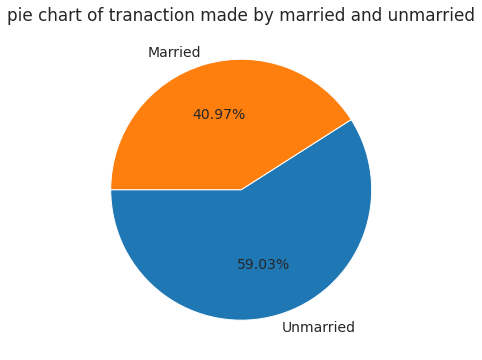

In [101]:
plt.pie(Married_transaction,labels=['Unmarried','Married'],autopct='%1.2f%%', startangle=180)
plt.title('pie chart of tranaction made by married and unmarried');

#### Observation  and answer
Married do not shop more. Unmarried shop more then married.
- 59% of the purchasers are unmarried.

### Q7: Which occupation of the men shop more? and what about the women ?

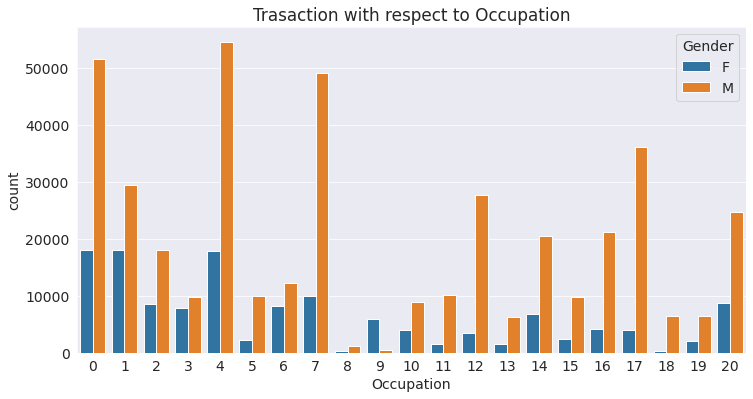

In [103]:
## Visualization occupation vs purchase
sns.countplot(x='Occupation',hue = 'Gender',data = df_train)
plt.title('Trasaction with respect to Occupation');

#### Observation and Answer
People of the occupation '4' shop more then others either men or women. 
- difference is very less in occupation '3' in shopping of men and women.
- Only in the occupation '9',Women purchase more then men. why? 
- Maybe in this occupation more women envolved then men.

### Q8: Which is the most expensive transaction in the dataset ? print the information.

In [104]:
#  Record of the most expensive transaction of the dataset.
df_train.loc[df_train['Purchase'].idxmax()]

User_ID                         1001474
Product_ID                    P00052842
Gender                                M
Age                               26-35
Occupation                            4
City_Category                         A
Stay_In_Current_City_Years            2
Marital_Status                        1
Product_Category_1                   10
Product_Category_2                 15.0
Purchase                          23961
Name: 87440, dtype: object

#### Observation:
- User with user_id 1001474 did the most expensive deal. information is given below-

- Gender                                'M'
- Age                               '26-35'
- Occupation                            '4'
- City_Category                         'A'
- Stay_In_Current_City_Years            '2'
- Marital_Status                        '1'
- Product_Category_1                   '10'
- Product_Category_2                 '15.0'
- Purchase                          '23961' 

## Inferences and Conclusion

We analyze this dataset and driving the interesting insight and try to answer all the question. Now we collect all the insight and try to make some conclusions


- Product P00265242 is the most popular product.
- 75.3% of the transaction done by Male.
- 24.7% of the transaction done by Female.
- Buyers are mostly lie in the 26-35 age-group.
- Mostly Purchers are from category 'B'.
- The people who stay in less then 1 years have to purchase more to arrange the Households. Maybe they prefer local market to purchase and explore the city.
- User_ID 1001680 did the highest transaction.
- Occupation '4' has the higest transaction in dataset and Occupation '8' has the lowest transaction in dataset.
- Unmarried purchase more than married. 59% of the purchasers are unmarried.
- purchase cost is normally distributed.
- same ratio of distribution shown by both the Genders in different city categories and different age-groups.
- In Product_category_1,

 men purchase most product of category '1' item but women purchase category '5' items.
- In Product_category_2,

 men purchase most product of category '8.0' items but women purchase category '14.0' items.
- Womens neither purchase more product no purchase costly products.


## References and Future Work

I do my best for making this project. having the limited information about the dataset I try to explain it as much as possible. In this project I use the techniques what I have learned throughout this course, Data Analysis with Python: Zero to Pandas. and I take the help from reference project suggested to the blue print of the project submission notebook. in the future I try to analyze the data with the information of the shopping site that 
- What type of product sold by the site.
- We use the population ratio and Literacy rate of the city.
- Know more about the product_category. 


 
Nptebooks that help me:
- Stack Overflow Developer Survey: https://jovian.ai/aakashns/python-eda-stackoverflow-survey
also all the websites of the python modules help me
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- opendatasets Python library: https://github.com/JovianML/opendatasets

And I will write a blog about this dataset in Medium. This will be the my first blog in medium. 